In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# LOADING AND KNOWING THE DATASET

In [2]:
# Loading the data

df = pd.read_csv('campaign_data.csv')

In [3]:
df.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Dropping the 'Z_CostContact', 'Z_Revenue' columns because it will serve no use in the analysis

df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [8]:
df.shape

(2240, 27)

# DATA CLEANING

In [9]:
# handling missing data

null_data = df.isnull().sum()
percent_null = (null_data / df.shape[0]) * 100

In [10]:
# what percentage of data is missing

percent_null = percent_null[percent_null > 0]

In [11]:
percent_null.sort_values(ascending = True, inplace = True)

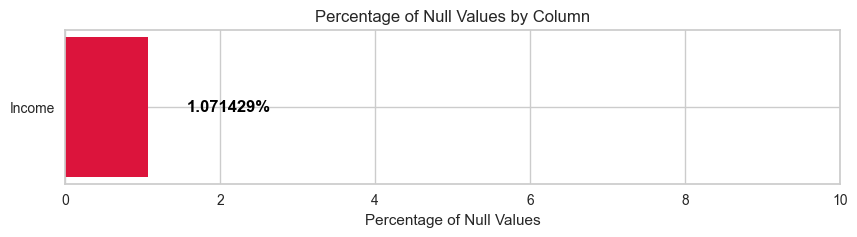

In [12]:
fig, ax = plt.subplots(figsize = (10, 2))
ax.barh(percent_null.index, percent_null, color='crimson')

# Annotating the plot
for i, v in enumerate(percent_null):
    ax.text(v + 0.5, i, f'{v:2f}%', color='black', va='center', fontweight='bold')

# Customizing the plot
ax.set_xlim([0,10])
ax.set_xlabel('Percentage of Null Values')
ax.set_title('Percentage of Null Values by Column')
plt.show()

In [13]:
df[df['Income'].isnull()].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0


In [14]:
df = df.dropna(subset=['Income'])
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [15]:
# handling duplicate values

duplicates = df[df.duplicated(keep=False)]
duplicates_revised = duplicates.sort_values(by=['ID', 'Year_Birth', 'Income', 'Dt_Customer'])

duplicates_revised.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


**There are no duplicate rows in this dataset.**

In [16]:
# counting the unique IDs

unique_ID_count = df['ID'].nunique()
print(unique_ID_count)

2216


In [17]:
# looking for any ID that's not an integer

def is_valid_id(val):
    try:
        int_val = int(val)
        return True
    except (ValueError, TypeError):
        return False

anomalous_ids = df[~df['ID'].apply(is_valid_id)]
print('Anomalous IDs:')
print('-'*16)
print(anomalous_ids)

Anomalous IDs:
----------------
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 27 columns]


**No non-numeric IDs in the dataset.**

In [18]:
# checking inconsistencies in the Education column

unique_education_entries = df['Education'].unique()
unique_education_count = df['Education'].nunique()

print(f"Number of unique education entries: {unique_education_count}")
print('Unique entries in the education column:')
print('-'*40)
print(unique_education_entries)

Number of unique education entries: 5
Unique entries in the education column:
----------------------------------------
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [19]:
# Correcting the entries

df['Education'] = df['Education'].replace(['Graduation','PhD','Master', '2n Cycle'], 'PostGrad')
df['Education'] = df['Education'].replace('Basic', 'UnderGrad')

unique_education_entries = df['Education'].unique()
print(unique_education_entries)

['PostGrad' 'UnderGrad']


In [20]:
# doing the same for the Marital Status column

unique_marital_entries = df['Marital_Status'].unique()
unique_marital_count = df['Marital_Status'].nunique()

print(f"Number of unique education entries: {unique_marital_count}")
print('Unique entries in the Marital Status column:')
print('-'*45)
print(unique_marital_entries)

Number of unique education entries: 8
Unique entries in the Marital Status column:
---------------------------------------------
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [21]:
abnormal_entries = df[df['Marital_Status'].isin(['Absurd', 'YOLO'])].shape[0]

percentage_abnormal_entries = (abnormal_entries / df.shape[0]) / 100

print(f"The percentage of abnormal entries in the Marital Status column is: {percentage_abnormal_entries:2f}%")

The percentage of abnormal entries in the Marital Status column is: 0.000018%


In [22]:
# Dropping rows with abnormal entries in the Marital Status column
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Displaying the cleaned Dataframe
unique_marital_entries = df['Marital_Status'].unique()
print(unique_marital_entries)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


In [23]:
# looking for inconsistencies in the Year_Birth column

df.loc[:, 'Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')  # coercing non-numeric entries to NaN

In [24]:
invalid_years = df[(df['Year_Birth'] < 1900) |
                (df['Year_Birth'].astype(str).str.len() != 4) | (~df['Year_Birth'].astype(str).str.isdigit())
]

print("Rows with inconsistent entries in 'Year_Birth' column:")
print(invalid_years)

Rows with inconsistent entries in 'Year_Birth' column:
        ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
239  11004        1893  PostGrad         Single  60182.0        0         1   
339   1150        1899  PostGrad       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
239  17-05-2014       23         8  ...                    0   
339  26-09-2013       36       755  ...                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
239             0             0             0         0         0  
339             1             0             0         0         0  

[2 rows x 27 columns]


In [25]:
df['Year_Birth'].isnull().sum()

0

In [26]:
invalid_years_count = df[df['Year_Birth'].isin(invalid_years)].shape[0]
invalid_years_percentage = (invalid_years_count / df.shape[0]) / 100

print(f"Percentage of anomalous years of birth: {invalid_years_percentage:2f}%")

Percentage of anomalous years of birth: 0.000000%


In [27]:
df = df[~df['Year_Birth'].isin(invalid_years)] #dropping the invalid years of births

In [28]:
# resetting index

df.reset_index(drop=True, inplace=True)
df.shape

(2212, 27)

# FEATURE ENGINEERING

In [29]:
df['Age'] = 2021 - df['Year_Birth'] # Calculating the age of the customers

In [30]:
# calculating total money spent by each customers

df['Spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [31]:
df['Children'] = df['Kidhome'] + df['Teenhome'] # calculating total children

In [32]:
# if the customers are living alone or with a partner

df['Partner'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Widow':'Alone', 'Divorced':'Alone', 'Alone':'Alone'})

In [33]:
df['Family'] = df['Partner'].replace({'Alone':1, 'Partner':2}).astype(int) + df['Children'].astype(int) # family size

In [34]:
df['Has_Kids'] = np.where(df.Children > 0, 1, 0) # identifying the customers who have children

In [35]:
# For the ease of analysis, renaming some columns

df=df.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [36]:
# calculating how long an individual has been a customer for

def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%Y-%m-%d'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
    return pd.NaT

# Applying the custom function to the 'Dt_Customer' column
df['Dt_Customer'] = df['Dt_Customer'].apply(parse_date)

reference_date = pd.to_datetime('2021-11-07')

# Calculate the duration in years
df['Customer_Duration_Years'] = (reference_date - df['Dt_Customer']).dt.days / 365

In [37]:
df.columns # checking the new columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Children',
       'Partner', 'Family', 'Has_Kids', 'Customer_Duration_Years'],
      dtype='object')

In [38]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Response,Age,Spent,Children,Partner,Family,Has_Kids,Customer_Duration_Years
0,5524,1957,PostGrad,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,64,1617,0,Alone,1,0,9.180822
1,2174,1954,PostGrad,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,67,27,2,Alone,3,1,7.673973
2,4141,1965,PostGrad,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,56,776,0,Partner,2,0,8.219178
3,6182,1984,PostGrad,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,37,53,1,Partner,3,1,7.745205
4,5324,1981,PostGrad,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,40,422,1,Partner,3,1,7.805479


In [39]:
# making a new dataset to carry out further analysis in

customer = ['Education', 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Children',
       'Partner', 'Family', 'Has_Kids', 'Customer_Duration_Years']

customer_data = df[customer]
customer_data.head(10)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Children,Partner,Family,Has_Kids,Customer_Duration_Years
0,PostGrad,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,64,1617,0,Alone,1,0,9.180822
1,PostGrad,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,67,27,2,Alone,3,1,7.673973
2,PostGrad,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,56,776,0,Partner,2,0,8.219178
3,PostGrad,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,37,53,1,Partner,3,1,7.745205
4,PostGrad,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,40,422,1,Partner,3,1,7.805479
5,PostGrad,62513.0,16,520,42,98,0,42,14,2,...,0,0,0,54,716,1,Partner,3,1,8.167123
6,PostGrad,55635.0,34,235,65,164,50,49,27,4,...,0,0,0,50,590,1,Alone,2,1,8.989041
7,PostGrad,33454.0,32,76,10,56,3,1,23,2,...,0,0,0,36,169,1,Partner,3,1,8.506849
8,PostGrad,30351.0,19,14,0,24,3,3,2,1,...,0,0,1,47,46,1,Partner,3,1,8.427397
9,PostGrad,5648.0,68,28,0,6,1,1,13,1,...,0,0,0,71,49,2,Partner,4,1,7.660274


# EXPLORATORY DATA ANALYSIS

Pairplot of selected features


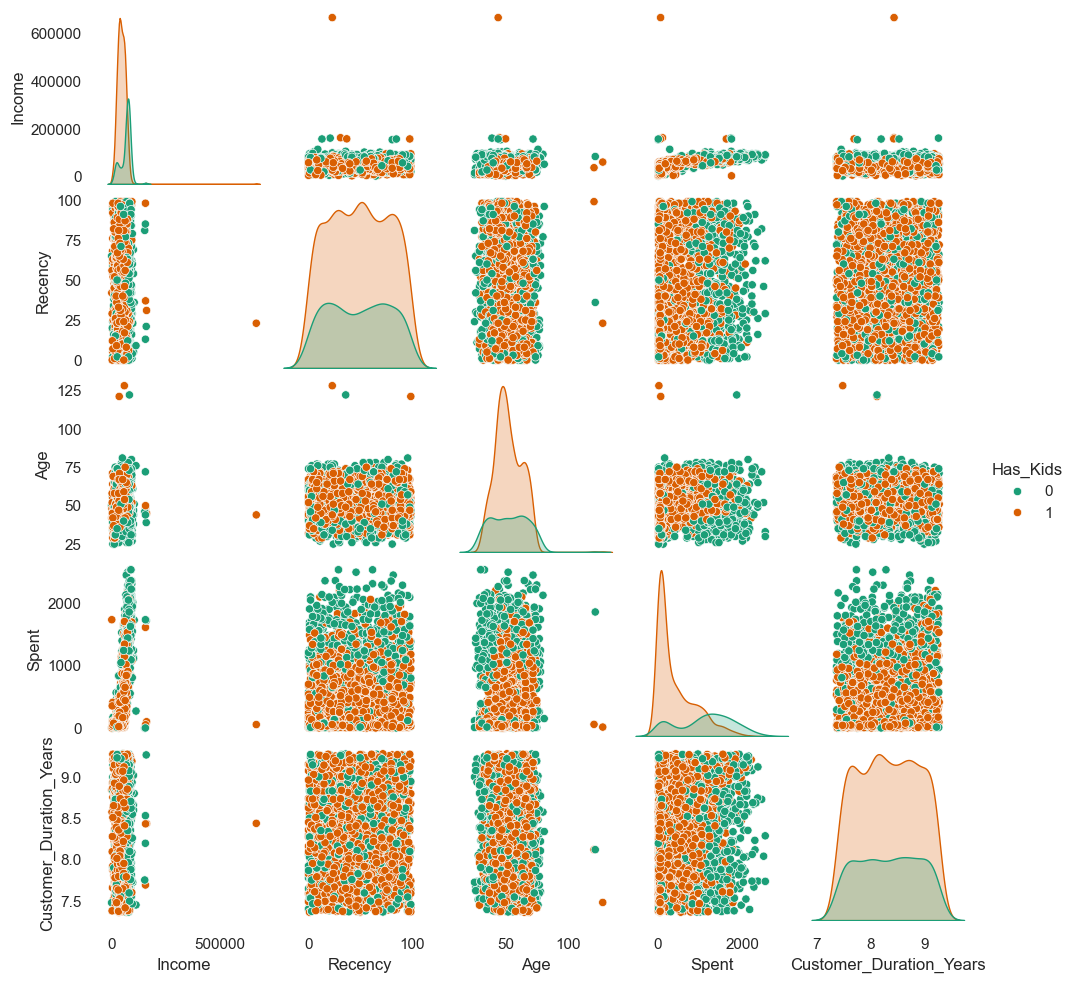

In [40]:
# to look for outliers and correlations

sns.set(rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'}, style='darkgrid')
print('Pairplot of selected features')
plot = ['Income', 'Recency', 'Age', 'Spent', 'Has_Kids', 'Customer_Duration_Years']
sns.pairplot(customer_data[plot], hue = 'Has_Kids', palette='Dark2', height=2, aspect=1)
plt.show()

**It is clear from the pairplot that there are quite a few outliers present in the dataset, in the 'Age', and 'Income' column. It is better to drop those rows to reduce the noise and have a comprehensive analysis.**

In [41]:
# dropping outliers

customer_data = customer_data[(customer_data["Age"]<90)]
customer_data = customer_data[(customer_data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(customer_data))

The total number of data-points after removing the outliers are: 2208


In [42]:
# turning categorical data into quantitative data

object_cols = ['Education', 'Partner']

LE = LabelEncoder()
for col in object_cols:
    customer_data[col] = LE.fit_transform(customer_data[col])

print('All data in the dataframe is now numerical.')

All data in the dataframe is now numerical.


In [43]:
customer_data.head(5)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Response,Age,Spent,Children,Partner,Family,Has_Kids,Customer_Duration_Years
0,0,58138.0,58,635,88,546,172,88,88,3,...,0,0,1,64,1617,0,0,1,0,9.180822
1,0,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,67,27,2,0,3,1,7.673973
2,0,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,56,776,0,1,2,0,8.219178
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,37,53,1,1,3,1,7.745205
4,0,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,40,422,1,1,3,1,7.805479


In [44]:
cc = customer_data.copy() # making another copy of the dataset

# dropping some features from the copy to make it easier for analysis

drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
cc = cc.drop(drop, axis = 1)

# DATA PREPROCESSING

**In order to carry out K-means clustering that relies on distance metrics, it is important to scale a dataset to correctly measure distances.**

In [45]:
s = StandardScaler()
s.fit(cc)
scaled_cc = pd.DataFrame(s.transform(cc), columns = cc.columns)

In [46]:
scaled_cc.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Children,Partner,Family,Has_Kids,Customer_Duration_Years
0,-0.158334,0.287689,0.309118,0.977018,1.553315,1.689944,2.464405,1.482521,0.858552,0.352174,...,2.506603,-0.555083,0.692301,1.017915,1.676120,-1.265454,-1.353059,-1.761762,-1.582644,1.529391
1,-0.158334,-0.260057,-0.382230,-0.871705,-0.636864,-0.717917,-0.651086,-0.634157,-0.733610,-0.167612,...,-0.570823,-1.169892,-0.133077,1.274437,-0.962274,1.403240,-1.353059,0.447193,0.631854,-1.188122
2,-0.158334,0.913505,-0.797039,0.357814,0.571511,-0.178378,1.346494,-0.147565,-0.034612,-0.687398,...,-0.228887,1.289346,-0.545767,0.333858,0.280592,-1.265454,0.739066,-0.657284,-1.582644,-0.204876
3,-0.158334,-1.174887,-0.797039,-0.871705,-0.561341,-0.655491,-0.504474,-0.585498,-0.753027,-0.167612,...,-0.912759,-0.555083,0.279612,-1.290779,-0.919130,0.068893,0.739066,0.447193,0.631854,-1.059658
4,-0.158334,0.294887,1.553545,-0.391748,0.420464,-0.218509,0.155277,-0.001587,-0.558861,1.391746,...,0.113050,0.059727,-0.133077,-1.034258,-0.306824,0.068893,0.739066,0.447193,0.631854,-0.950957


**Reducing dimensionality is essential to reduce multicollinearity, and ultimately have an accurate analysis.**

In [47]:
# dimensionality reduction

pca = PCA(n_components=4)
pca.fit(scaled_cc)
pca_data = pd.DataFrame(pca.transform(scaled_cc), columns=(['col1','col2', 'col3', 'col4']))

pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2208.0,-1.351576e-16,2.783613,-5.732057,-2.455678,-0.865253,2.301081,7.480657
col2,2208.0,6.436076e-18,1.562350,-4.701497,-1.050414,-0.139849,1.072652,6.070381
col3,2208.0,1.448117e-17,1.226160,-3.674072,-0.849542,-0.078210,0.836253,6.286191
col4,2208.0,3.861645e-17,1.096559,-2.793921,-0.792918,0.082606,0.704803,4.710951


# K-MEANS CLUSTERING

Using the elbow method to determine the number of clusters:


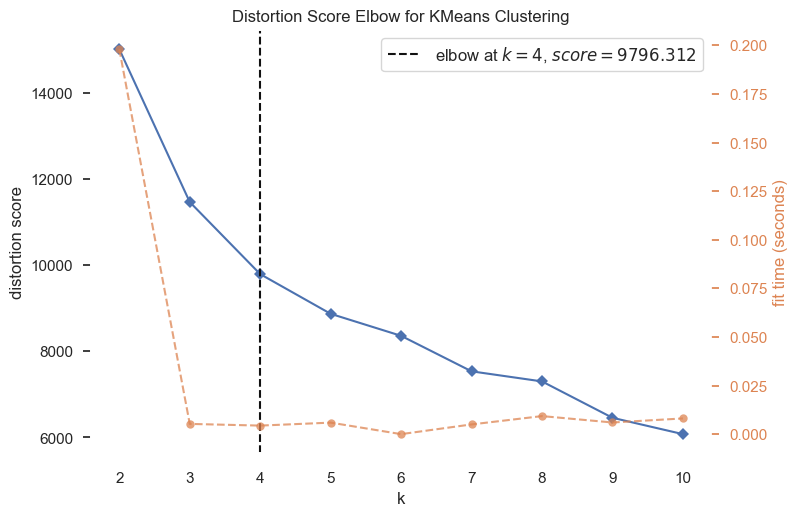

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
print('Using the elbow method to determine the number of clusters:')

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(pca_data)
elbow.show()

In [49]:
# creating the 4 clusters

AC = AgglomerativeClustering(n_clusters=4)
pca_data['cluster'] = AC.fit_predict(pca_data)
customer_data['cluster'] = AC.fit_predict(pca_data)

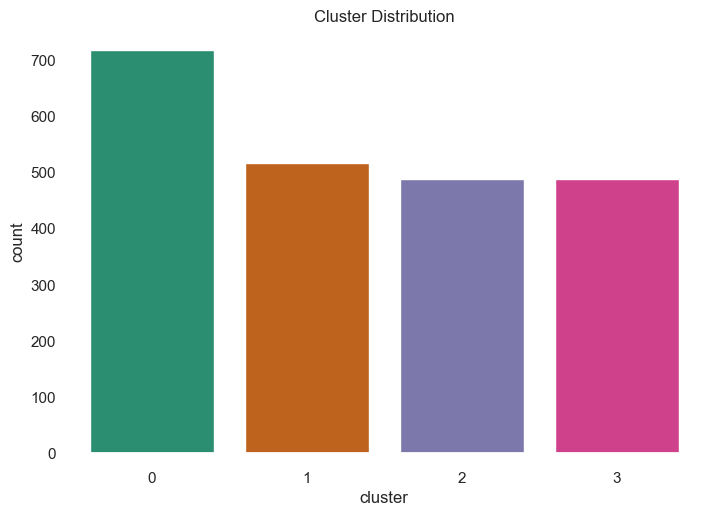

In [50]:
countplot = sns.countplot(x=pca_data['cluster'], palette='Dark2')
countplot.set_title('Cluster Distribution')
plt.show()

**Cluster 0 has the highest amount of customers, almost 700. And Cluster 2 has the lowest number of customers of around 500. We will now look at the charateristics of these clusters.**

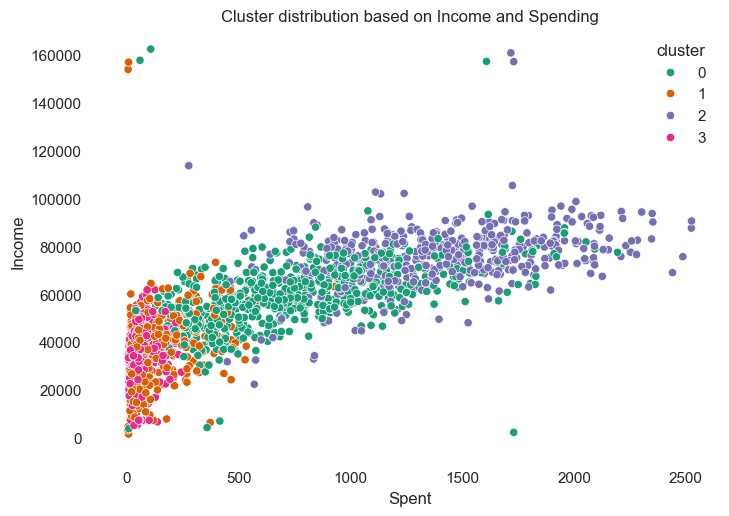

In [51]:
# Taking a look at the clusters' income and spendings

plot = sns.scatterplot(data=customer_data, x=customer_data['Spent'], y=customer_data['Income'], hue=customer_data['cluster'], palette='Dark2')
plot.set_title('Cluster distribution based on Income and Spending')
plt.show()

**Observations:**


**1. Cluster 1 and 3 have the lowest income and spending, with Cluster 1 being slightly higher.**

**2. Cluster 0 is in the middle, with income ranging from $30,000 - $80,000, and spending ranging from $500 - $2000.**

**3. Cluster 2 has the highest income ranging from $40,000 - $100,000, and their spending ranges from $1000 - $2500.**

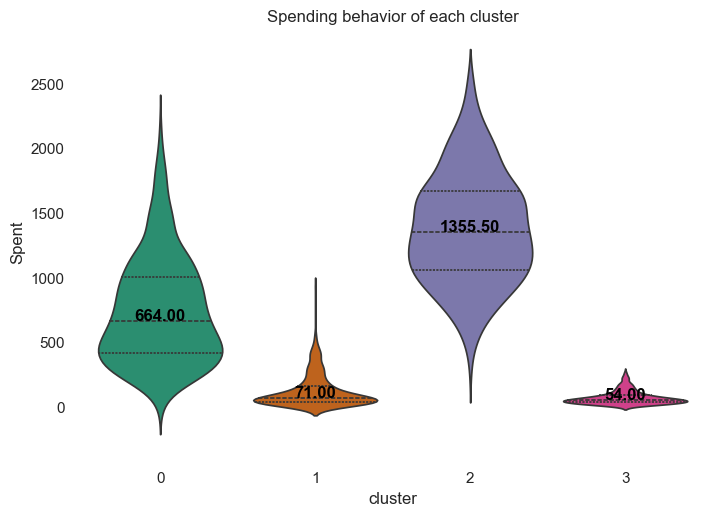

In [52]:
# Taking a look at which cluster of customers spend the most

plt.figure()
vp =sns.violinplot(x=customer_data['cluster'], y=customer_data['Spent'], palette='Dark2', inner="quartile")

#Annotating
medians = customer_data.groupby(['cluster'])['Spent'].median().values
clusters = customer_data['cluster'].unique()

for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')


vp.set_title('Spending behavior of each cluster')
plt.show()

**This violin plot reaffirms my observations above.**

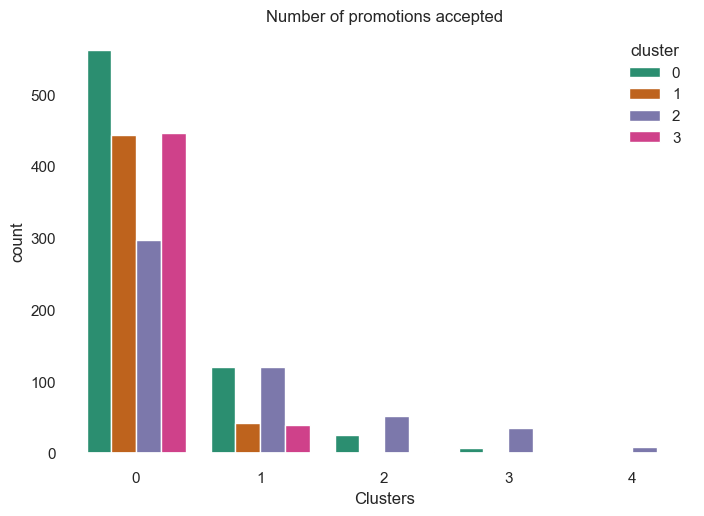

In [53]:
customer_data['promos_accepted'] = customer_data['AcceptedCmp3']+customer_data['AcceptedCmp4']+ customer_data['AcceptedCmp5']+customer_data['AcceptedCmp1']+customer_data['AcceptedCmp2']

plot = sns.countplot(x=customer_data['promos_accepted'], hue=customer_data['cluster'], palette='Dark2')
plot.set_title('Number of promotions accepted')
plot.set_xlabel('Clusters')
plt.show()

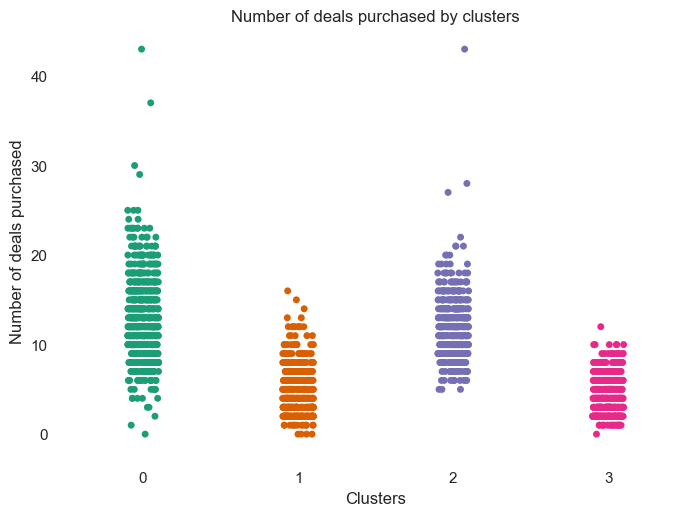

In [54]:
customer_data['purchases'] = customer_data['NumDealsPurchases'] + customer_data['NumWebPurchases'] + customer_data['NumCatalogPurchases']

plt.figure()
sns.stripplot(x=customer_data['cluster'], y=customer_data['purchases'], jitter=True, palette='Dark2')

plt.title('Number of deals purchased by clusters')
plt.xlabel('Clusters')
plt.ylabel('Number of deals purchased')
plt.show()

**Observations:**

**1. Most deals are purchased by Cluster 0 and 2.**


**2. Cluster 1 purchased the least number of deals.**

<Figure size 800x550 with 0 Axes>

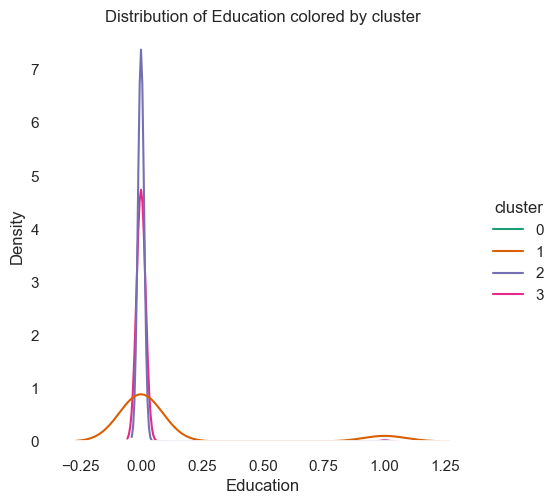

<Figure size 800x550 with 0 Axes>

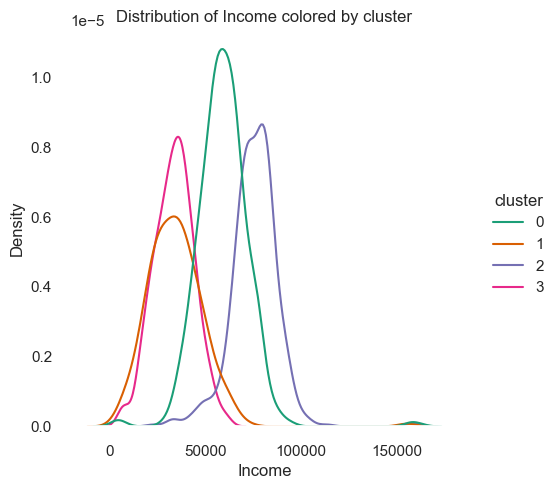

<Figure size 800x550 with 0 Axes>

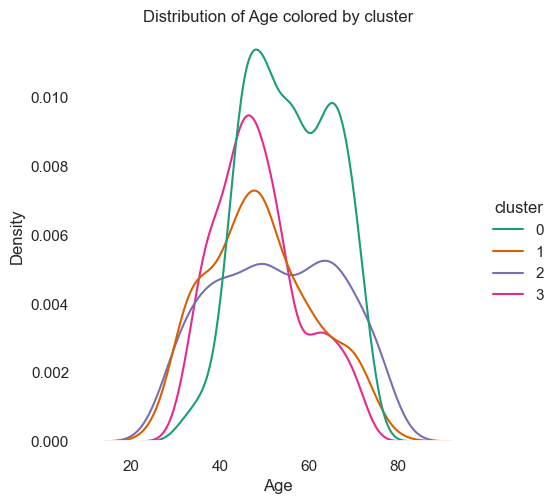

<Figure size 800x550 with 0 Axes>

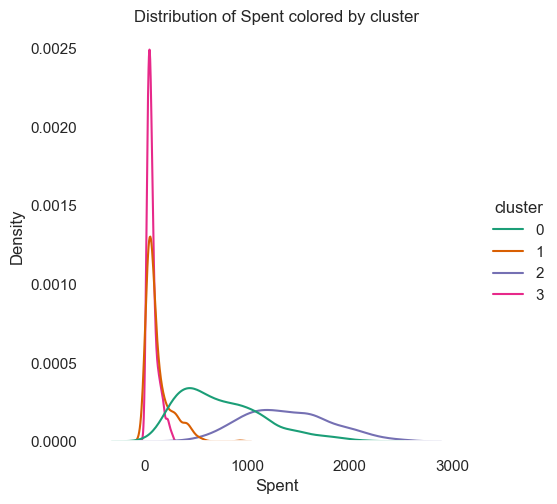

<Figure size 800x550 with 0 Axes>

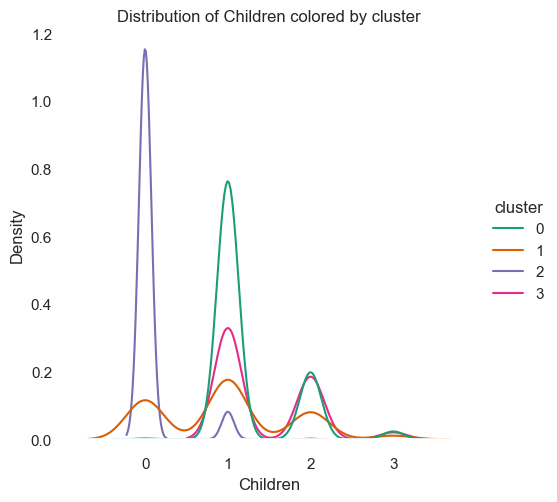

<Figure size 800x550 with 0 Axes>

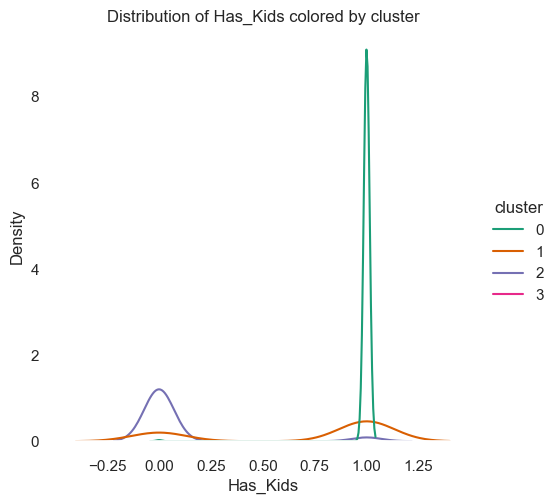

<Figure size 800x550 with 0 Axes>

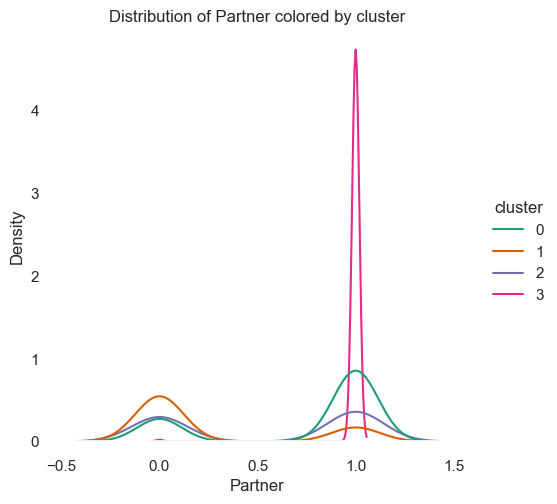

<Figure size 800x550 with 0 Axes>

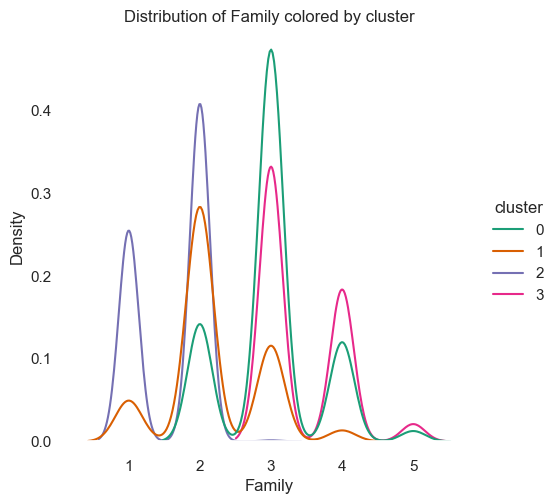

<Figure size 800x550 with 0 Axes>

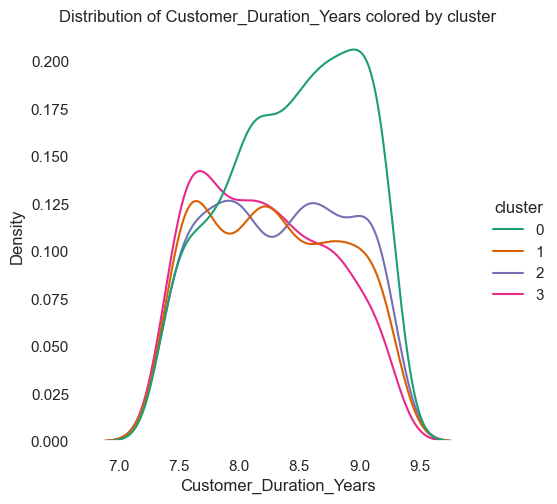

In [55]:
# Profiling the clusters

detail = ['Education', 'Income', 'Age', 'Spent', 'Children', 'Has_Kids', 'Partner', 'Family', 'Customer_Duration_Years']
customer_data['cluster'] = customer_data['cluster']

for d in detail:
    plt.figure()
    sns.displot(data=customer_data, x=d, hue='cluster', palette='Dark2', kind='kde')
    plt.title(f'Distribution of {d} colored by cluster')
    plt.show()

# CONCLUSION:

**Cluster 0 Profile:**


1. Most people in this cluster are aged between 40-60.

2. Majority of them have one child, some have two children.

3. Majority is living with a partner.

4. Family size ranges from 2-4 people, however majority has a family size of 3.

5. Of all the clusters, Cluster 0 has been a customer for the longest, mostly 9.5 years.

6. This cluster has the second highest income and spending, so marketing campaigns targeted to them are likely to succeed because this cluster accepts the highest number of promotions and deals.

**Cluster 1 Profile:**

1. Mostly aged between 20-40.

2. Majority of the people have one child or are childless.

3. Majority has a family size of 2, some of them have a family size of 3, or are living alone.

4. The people in this cluster have been a customer for 7-9 years.

5. These people mostly have a post-graduate degree, have an income ranging from 20,000-60,000, and are in the lowest spending group.

**Cluster 2 Profile:**

1. The people in this cluster earn the most and also spend the most. Almost all of them have a postgraduate degree, and are probably in the oldest age group.

2. An overwhelming lot of them have no children and most have a family size of 1 or 2.

3. These people have been a customer for 7-9 years.

4. If marketing campaigns targeted to this group succeeds, the corporation will benefit the most.

**Cluster 3 Profile:**

1. This cluster has the lowest income and spending.

2. Most of them are aged 25-40. Likely to have the biggest family size.

3. Most of these people have been a customer for 7-8 years.

4. This group of people is the second highest to accept promotional campaigns.